# Dengue Cases Analysis in San Juan and Iquitos

In [39]:
from IPython.display import display, Markdown

toc = """
# Table of Contents 

1. [Introduction](#Introduction)
2. [Exploratory Data Analysis](#EDA)

    2.1 [Handling Missing Values](#HMV)
    
    2.2 [Feature Engineering](#FE)
    
3. [Statistical Analysis](#SA)

    3.1 [Time Series Decomposition](#TSD)
    
    3.2 [Correlation Analysis](#CA)
    
    3.3 [Autocorrelation and Partial Autocorrelation](#APA)
    
    3.4 [Time Series Clustering](#Time-Series-Clustering)
    
    3.5 [Cross-Correlation Analysis](#Cross-Correlation-Analysis)
"""




In [38]:
display(Markdown(toc))


# Table of Contents 

1. [Introduction](#Introduction)
2. [Exploratory Data Analysis](#EDA)

    2.1 [Handling Missing Values](#HMV)
    
    2.2 [Feature Engineering](#FE)
    
3. [Statistical Analysis](#SA)

    3.1 [Time Series Decomposition](#TSD)
    
    3.2 [Correlation Analysis](#CA)
    
    3.3 [Autocorrelation and Partial Autocorrelation](#APA)
    
    3.4 [Time Series Clustering](#Time-Series-Clustering)
    
    3.5 [Cross-Correlation Analysis](#Cross-Correlation-Analysis)


## Introduction
<a id="Introduction"></a>
Dengue fever is a mosquito-borne viral infection that poses a significant public health threat in many tropical and subtropical regions around the world. In this study, we aim to predict the number of dengue fever cases reported each week in two cities: San Juan, Puerto Rico, and Iquitos, Peru. The dataset, provided by various U.S. Federal Government agencies, includes comprehensive information on climatic and environmental variables, as well as historical records of dengue cases. By leveraging this dataset, we intend to build predictive models that can accurately forecast dengue outbreaks, thereby aiding public health officials in taking proactive measures to control the spread of the disease.

The experiment involves analyzing the relationship between climatic variables and dengue cases, and developing predictive models to forecast future outbreaks. San Juan and Iquitos are both located in regions prone to dengue outbreaks, making them ideal candidates for this study. The data spans multiple years, providing a robust basis for analysis. Utilizing historical data and advanced statistical and machine learning techniques allows for the creation of accurate and reliable predictive models. This can significantly enhance current dengue surveillance systems.

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
from statsmodels.tsa.stattools import ccf
import geopandas as gpd

In [4]:
DengueTrainData = pd.read_csv("C:/Users/sreej/Downloads/Dengue study/dengue_features_train.csv")
DengueTrainLabel =  pd.read_csv("C:/Users/sreej/Downloads/Dengue study/dengue_labels_train.csv")

In [6]:
DengueTrainData.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [7]:
DengueTrainLabel.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [5]:
#Merge features and label data
DataFinal = pd.merge(DengueTrainData,DengueTrainLabel , on = ['city','year','weekofyear'])

In [8]:
# Rename city names
DataFinal['city'] = DataFinal['city'].replace({'sj': 'San Juan', 'iq': 'Iquitos'})

## Exploratory Data Analaysis
<a id="EDA"></a>


In [33]:
# Check for missing values
print(DataFinal.isnull().sum())

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

#### Handling Missing Values
## <a id="HMV"></a>
I found that there are missing values in the dataset and can be filled using different methods,

                                               1. Filling with mean
                                               2. Filling with median
                                               3. Filling with forward/backward values
                                               
The first and second methods use mean or median data for filling the missing values.  The last one is the forward fill, which moves the non-missing value that was previously seen forward until it is met by another non-missing value. In other words, the most recent value that is known is used to replace each missing value. Up until another non-missing value is found, the next observed non-missing value is propagated backward via the backward fill. In other words, the next known value is used to replace each missing value.

The last approach is appropriate for timeseries data, which is a series of data points gathered or recorded at successive periods in time, often at equal intervals. Our dataset may be classified as a time series dataset because it includes weekly data points for dengue cases and numerous climatic variables throughout time. As a result, we use the forward fill method to handle missing data. 

In [9]:
# Handling missing values using forward fill
DataFinalfill = DataFinal.fillna(method='ffill') # method='bfill' while using backward fill


# Verifying the filled values
print("Forward Fill Missing Values:")
print(DataFinalfill.isnull().sum())


Forward Fill Missing Values:
city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c       

#### Feature Engineering
<a id="FE"></a>
Feature engineering is the process of using domain knowledge to create new features from raw data that can help improve the performance of machine learning models. This involves transforming, extracting, or creating features that better represent the underlying patterns in the data, making it easier for the model to learn.

Here I am are generating lag features. Lag features are a type of feature used in time series analysis. They represent past values of a variable, which can help capture the temporal dependencies in the data. In our case, I am trying to predict dengue cases, lag features includes the number of cases in the previous week, two weeks ago, three weeks ago, etc. This allows the model to use past information to make future predictions.

In [10]:
# Creating lag features for total_cases
DataFinalfill['prev_week_cases'] = DataFinalfill.groupby('city')['total_cases'].shift(1)
DataFinalfill['prev2_week_cases'] = DataFinalfill.groupby('city')['total_cases'].shift(2)
DataFinalfill['prev3_week_cases'] = DataFinalfill.groupby('city')['total_cases'].shift(3)

In [11]:
#Fill any new missing values created by the lag features
DataFinalfill.fillna(method='bfill', inplace=True)

## Stastistical Analysis
<a id="SA"></a>

In [37]:
# Summary statistics
print(DataFinalfill.describe())

              year   weekofyear      ndvi_ne      ndvi_nw      ndvi_se  \
count  1456.000000  1456.000000  1456.000000  1456.000000  1456.000000   
mean   2001.031593    26.503434     0.131271     0.128068     0.202606   
std       5.408314    15.019437     0.138527     0.119561     0.074409   
min    1990.000000     1.000000    -0.406250    -0.456100    -0.015533   
25%    1997.000000    13.750000     0.039100     0.048250     0.152795   
50%    2002.000000    26.500000     0.113900     0.115926     0.195664   
75%    2005.000000    39.250000     0.232018     0.213429     0.247461   
max    2010.000000    53.000000     0.508357     0.454429     0.538314   

           ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
count  1456.000000           1456.000000            1456.000000   
mean      0.201987             45.686937             298.697965   
std       0.083592             43.779318               1.361950   
min      -0.063457              0.000000             294.635714  

#### Time Series Decomposition
<a id="TSD"></a>
**Enhanced Understanding**: Time series decomposition helps in understanding the underlying patterns in the data by breaking it down into trend, seasonal, and residual components. This is crucial for identifying long-term trends, seasonal effects, and anomalies.

**Trend Analysis**: By isolating the trend component, we can observe the general direction of dengue cases over time. This helps in understanding whether the situation is improving or worsening and can inform public health interventions.

**Seasonal Patterns**: The seasonal component reveals regular patterns that repeat over a fixed period (e.g., yearly). This is particularly important for dengue fever, which can be influenced by seasonal climatic conditions such as rainfall and temperature.

**Residual Analysis**: The residual component captures the irregularities and anomalies not explained by trend and seasonality. This helps in identifying unusual events or outbreaks that require further investigation.

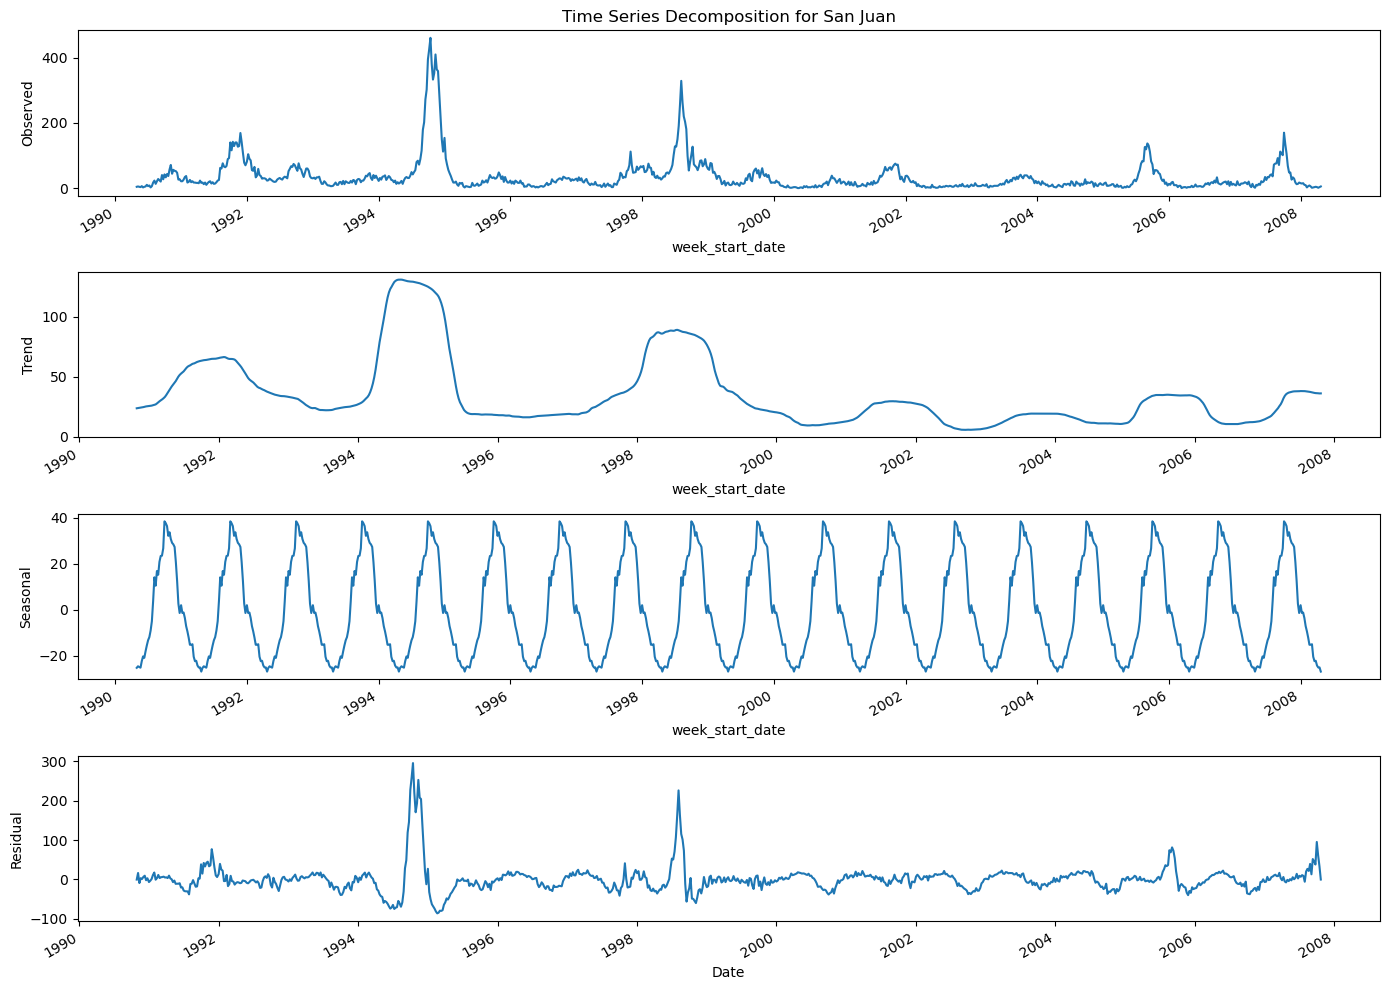

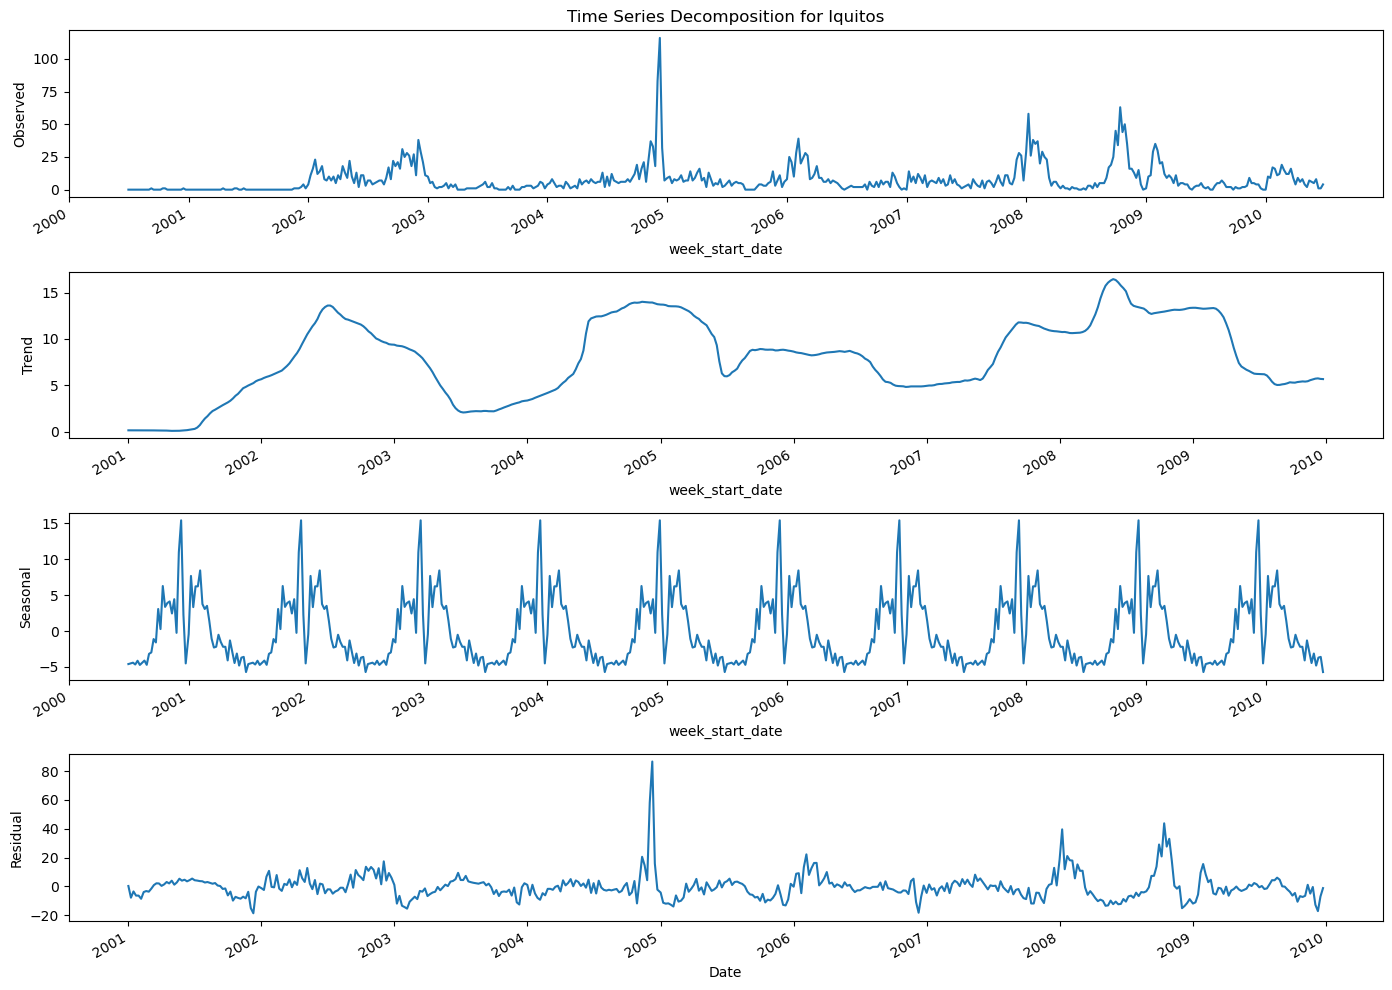

In [43]:

# Ensuring datetime format
DataFinalfill['week_start_date'] = pd.to_datetime(DataFinalfill['week_start_date'])

# Decompose time series for each city
for city in DataFinalfill['city'].unique():
    city_data = DataFinalfill[DataFinalfill['city'] == city].set_index('week_start_date')
    decomposition = seasonal_decompose(city_data['total_cases'], model='additive', period=52)  # weekly data
    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10))
    decomposition.observed.plot(ax=ax1)
    ax1.set_ylabel('Observed')
    ax1.set_title(f'Time Series Decomposition for {city}')
    
    decomposition.trend.plot(ax=ax2)
    ax2.set_ylabel('Trend')
    
    decomposition.seasonal.plot(ax=ax3)
    ax3.set_ylabel('Seasonal')
    
    decomposition.resid.plot(ax=ax4)
    ax4.set_ylabel('Residual')
    ax4.set_xlabel('Date')
    
    plt.tight_layout()
    plt.show()


The time series decomposition for San Juan and Iquitos provides valuable insights into the dynamics of dengue fever cases in these cities. By analyzing the trend, seasonal, and residual components separately, we gain a clearer understanding of the factors influencing dengue outbreaks. This approach not only helps in better modeling and prediction but also in designing targeted public health strategies to mitigate the impact of dengue fever.

#### Correlation Analysis
<a id="CA"></a>
Correlation Analysis is a essential step for exploratory data analysis. It identifies relationships between multiple variables and also helps in selecting relevant features for predictive modeling. It identifies multicollinearity among independent variables.

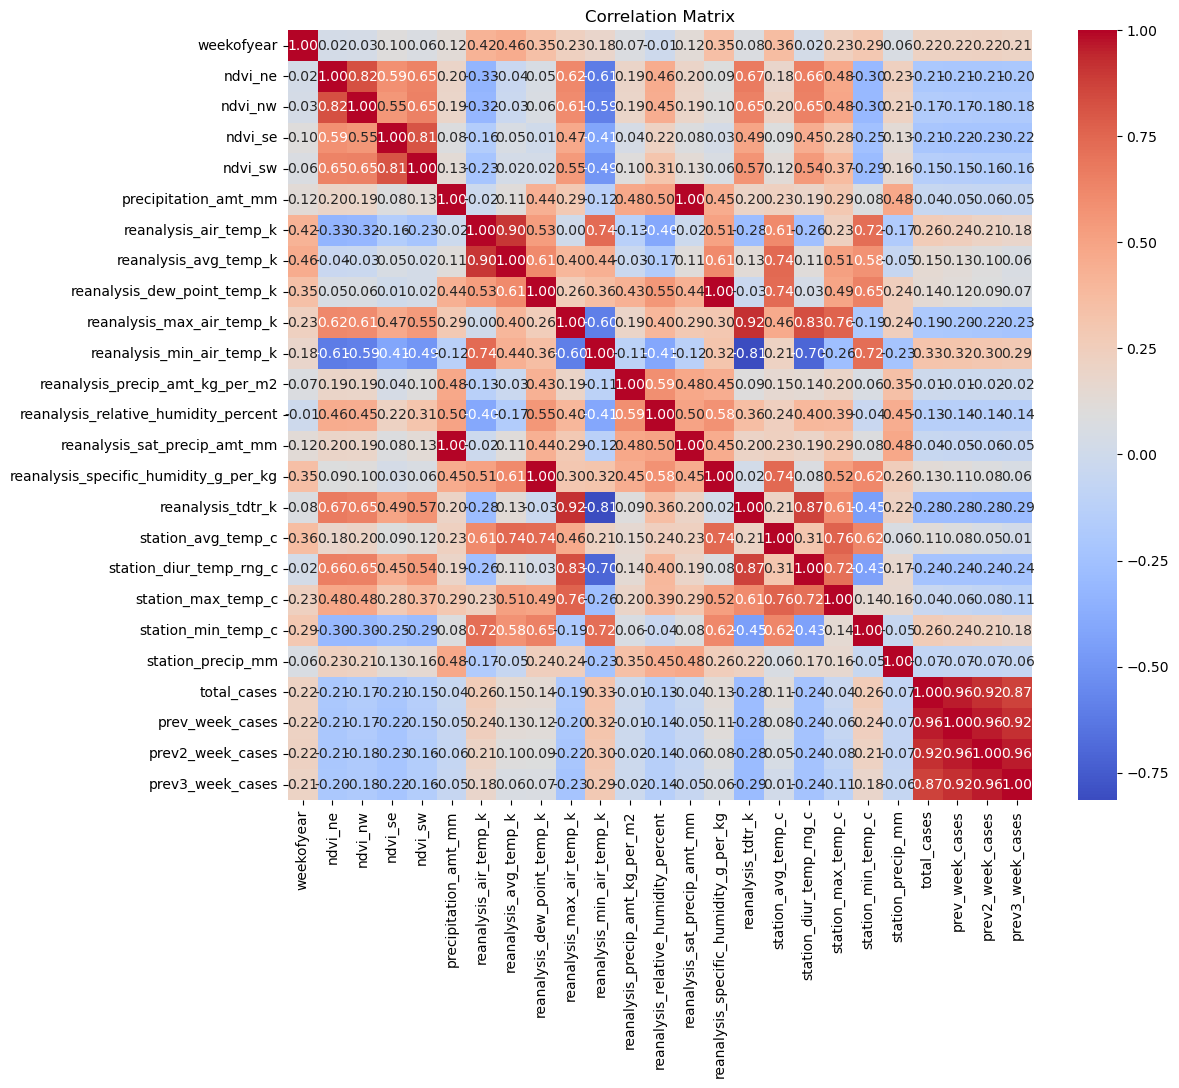

In [28]:

# Calculate correlation matrix
correlation_matrix = DataFinalfill.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### Autocorrelation and Partial Autocorrelation
<a id="APA"></a>
Lags in time series analysis represent the previous values of the series shifted by a certain number of time periods. In this case lags represents  weeks. Autocorrelation helps understand how current values are related to past values at different lags, revealing the temporal dependencies and patterns in the data. This is crucial for building accurate predictive models and identifying underlying trends and seasonality.

Partial autocorrelation measures the correlation between a time series and its lagged values, removing the linear dependence of the intervening observations.It shows the direct relationship between the time series and its lagged values, excluding the influence of intermediate lags.

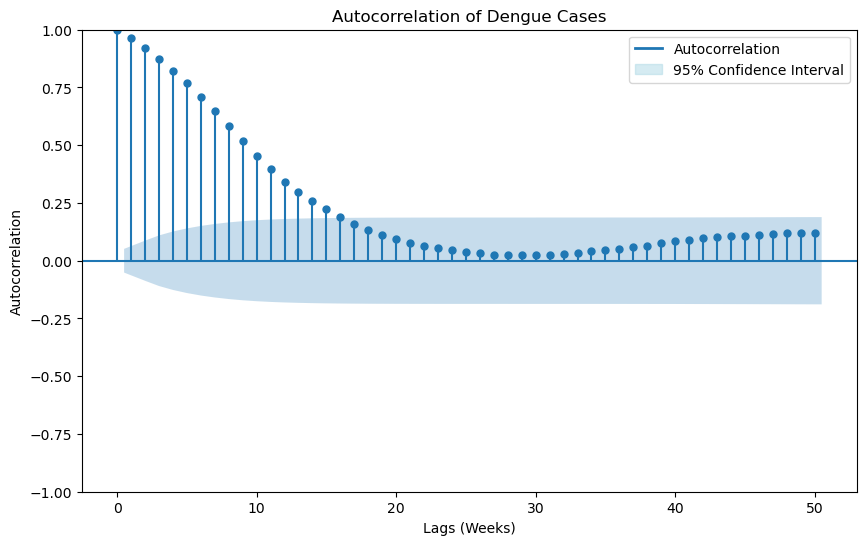

In [85]:
# Create the autocorrelation plot
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(DataFinalfill['total_cases'], lags=50, ax=ax)
ax.set_title('Autocorrelation of Dengue Cases')
ax.set_xlabel('Lags (Weeks)')
ax.set_ylabel('Autocorrelation')

# Create dummy lines for legend
autocorrelation_line = plt.Line2D([0], [0], color='C0', lw=2)  
confidence_interval_patch = plt.Rectangle((0, 0), 1, 1, color='lightblue', alpha=0.5)

# Add legend manually
ax.legend([autocorrelation_line, confidence_interval_patch], 
          ['Autocorrelation', '95% Confidence Interval'], loc='upper right')

plt.show()

In the above representation X-axis (lags) represents the number of time steps  by which the time series is shifted. The Y-axis (Autocorrelation) represents the correlation coefficient between the time series and its lagged values. Lag 1 with high autocorrelation (close to 1), indicating a strong correlation between the current week's cases and the previous week's cases. Lag 2, Lag 3, etc. decreasing autocorrelation, but still significant up to around lag 15. This suggests that past values up to 15 weeks ago have a significant influence on the current week's dengue cases.

C:\Users\sreej\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


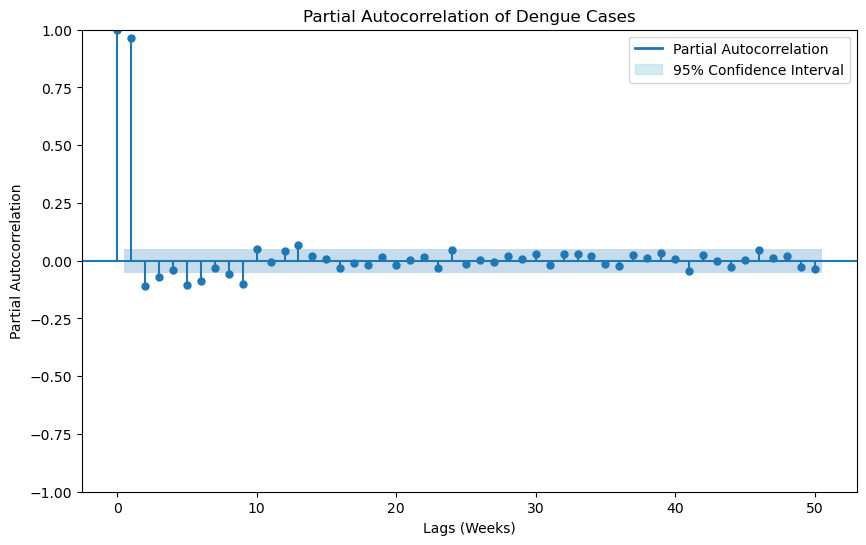

In [86]:
# Create the partial autocorrelation plot
fig, ax = plt.subplots(figsize=(10, 6))
pacf_plot = plot_pacf(DataFinalfill['total_cases'], lags=50, ax=ax)
ax.set_title('Partial Autocorrelation of Dengue Cases')
ax.set_xlabel('Lags (Weeks)')  
ax.set_ylabel('Partial Autocorrelation')  

# Add legends manually
partial_autocorrelation_line = plt.Line2D([0], [0], color='C0', lw=2)  
confidence_interval_patch = plt.Rectangle((0, 0), 1, 1, color='lightblue', alpha=0.5)

ax.legend([partial_autocorrelation_line, confidence_interval_patch], 
          ['Partial Autocorrelation', '95% Confidence Interval'], loc='upper right')

plt.show()

Lag 1: The partial autocorrelation at lag 1 is very high and significant (close to 1). This indicates a strong direct correlation between the dengue cases in the current week and the previous week. This suggests that the immediate past value is highly predictive of the current value.

Lag 2: The partial autocorrelation at lag 2 is also significant but lower than lag 1. This indicates that the value from two weeks ago still has a strong direct influence on the current value, but less so than the immediate past value.

Subsequent Lags: Beyond lag 2, the partial autocorrelations drop sharply and are mostly within the confidence interval. This indicates that the direct influence of past values on the current value diminishes quickly after the first two lags. The values for higher lags are mostly non-significant, suggesting that the influence of dengue cases from more than two weeks ago on the current week's cases is minimal after accounting for the first two weeks.

In [ ]:
# Drop non-numeric columns and any other irrelevant columns for modeling
#DataFinalfill = DataFinalfill.drop(['city', 'year', 'week_start_date'], axis=1)

#### Time Series Clustering
<a id="Time-Series-Clustering"></a>
Time series clustering can reveal distinct patterns in the dengue cases data, helping to identify similar trends and behaviors across different cities or time periods. By clustering the data, you can gain insights into the underlying structures and use this information for more targeted analysis and intervention strategies.

In [12]:
# Pivot the data to have cities as columns
df_pivot = DataFinalfill.pivot(index='week_start_date', columns='city', values='total_cases').fillna(0)

# Normalize the data
scaler = TimeSeriesScalerMeanVariance()
df_scaled = scaler.fit_transform(df_pivot.T)

# Convert the scaled data to the required format for tslearn
df_scaled = np.nan_to_num(df_scaled)

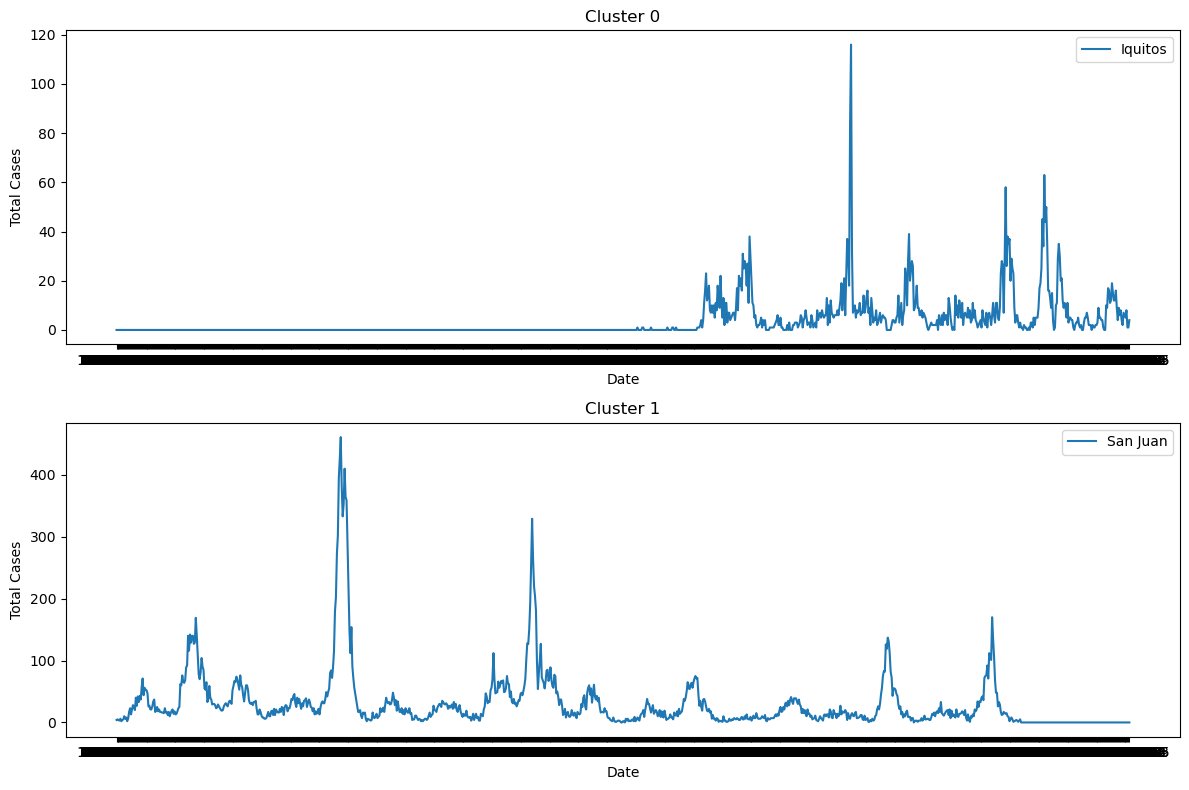

In [13]:
# Apply TimeSeriesKMeans clustering
n_clusters = 2  # Number of clusters
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", max_iter=10, random_state=0)
clusters = model.fit_predict(df_scaled)

# Add cluster information to the DataFrame
df_clustered = df_pivot.T.copy()
df_clustered['cluster'] = clusters

# Plot the clustered time series
plt.figure(figsize=(12, 8))
for cluster in range(n_clusters):
    plt.subplot(n_clusters, 1, cluster + 1)
    for city in df_clustered[df_clustered['cluster'] == cluster].index:
        plt.plot(df_clustered.columns[:-1], df_clustered.loc[city, df_clustered.columns[:-1]], label=city)
    plt.title(f'Cluster {cluster}')
    plt.xlabel('Date')
    plt.ylabel('Total Cases')
    plt.legend()
plt.tight_layout()
plt.show()


The clustering analysis has resulted in two distinct clusters for the dengue cases in Iquitos and San Juan. The clusters reveal different patterns of dengue outbreaks over time for each city.

**Cluster 0 Iquitos** : This cluster contains the time series data for Iquitos. The dengue cases show very low numbers from the early 1990s until around the year 2000. After 2000, there are noticeable increases in dengue cases with significant peaks, particularly around 2004.

**Cluster 1 San Juan** : This cluster contains the time series data for San Juan. The dengue cases show a cyclical pattern with regular peaks, particularly prominent in the early 1990s and around 1995. The cyclical nature continues with noticeable peaks every few years.

#### Cross-Correlation Analysis
<a id="Cross-Correlation-Analysis"></a>
Cross-correlation helps identify the time-lagged relationships between climate variables and dengue cases, revealing how changes in climate can predict changes in dengue outbreaks. By understanding which climate variables most strongly influence dengue cases and at what lags, public health officials can design more effective prevention and control strategies.

In [74]:
# Ensure datetime format
DataFinalfill['week_start_date'] = pd.to_datetime(DataFinalfill['week_start_date'])

# Normalize the data
scaler = TimeSeriesScalerMeanVariance()
df_scaled = scaler.fit_transform(df_pivot.T)

# Convert the scaled data to the required format for tslearn
df_scaled = np.nan_to_num(df_scaled)  # Replace any NaNs with 0

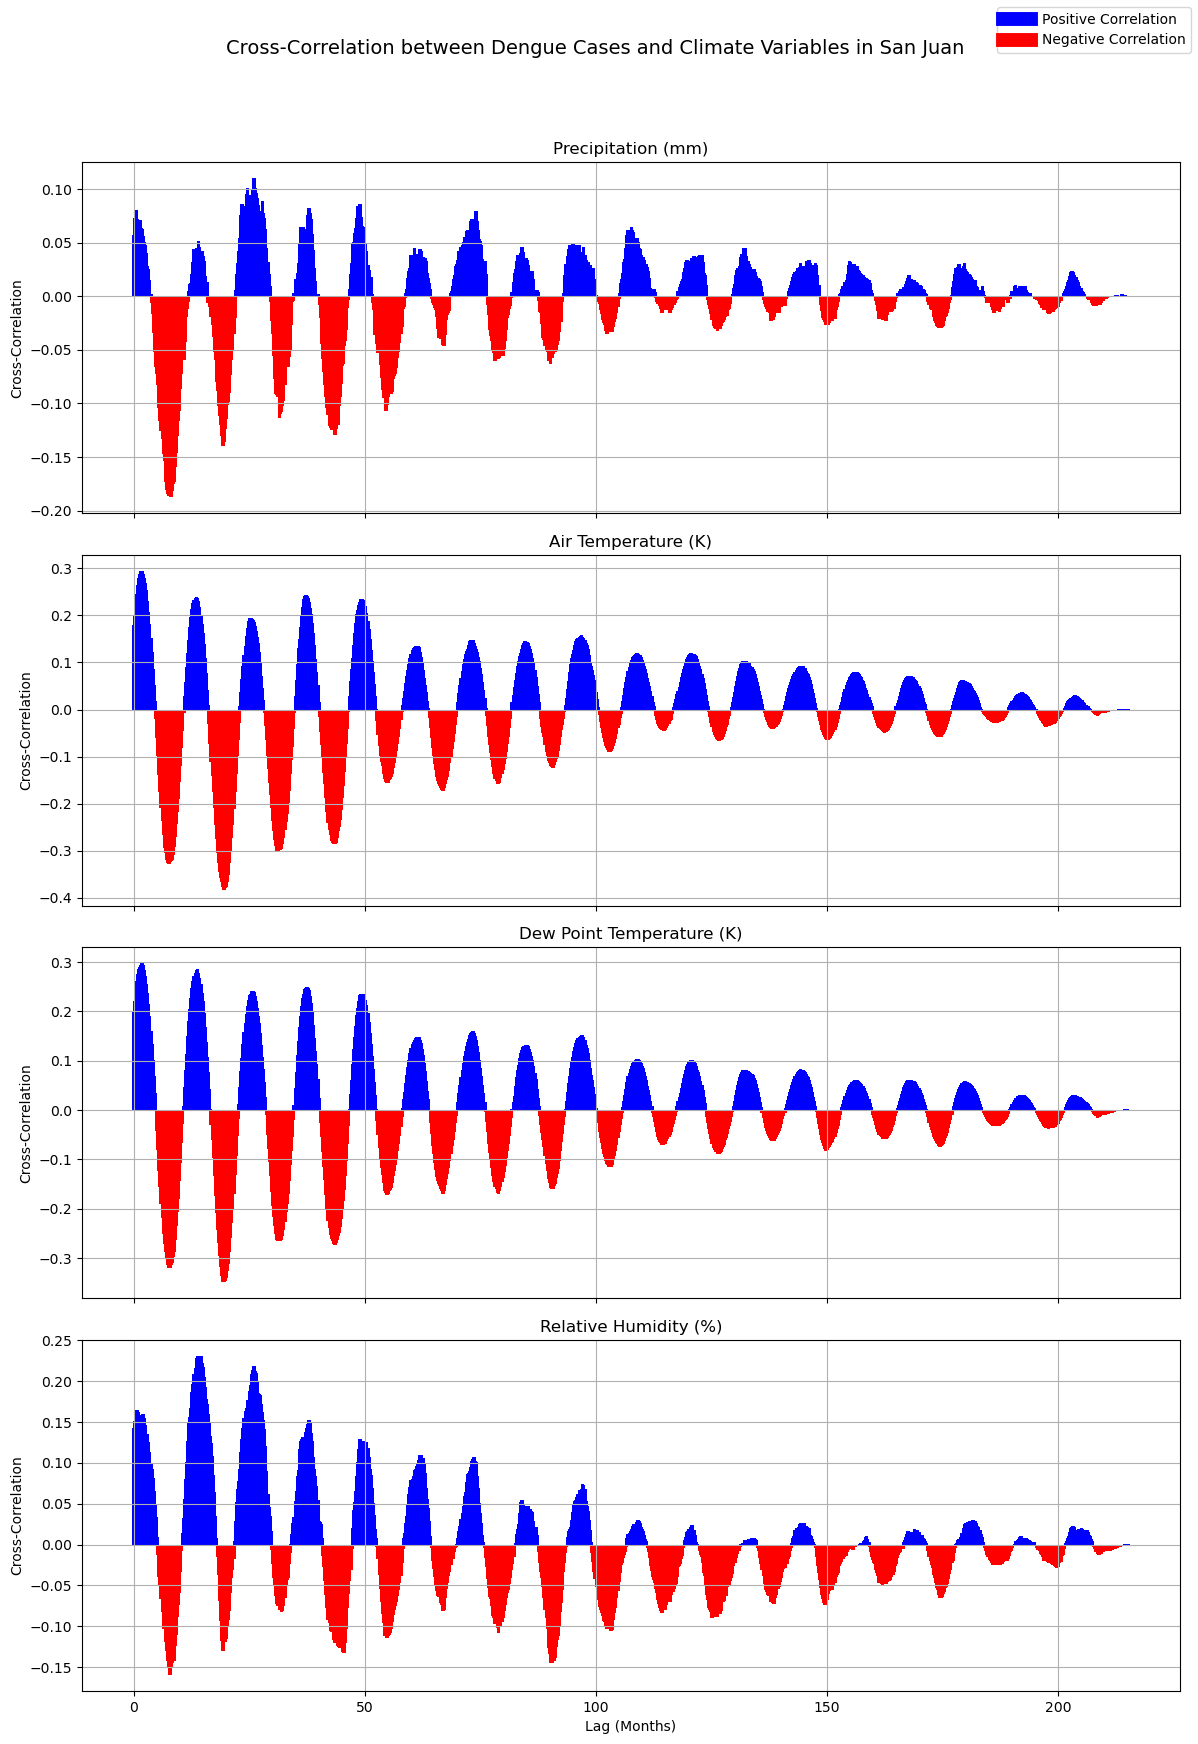

In [88]:
# Select the time series for cross-correlation analysis
city = 'San Juan'
dengue_cases = DataFinalfill[DataFinalfill['city'] == city]['total_cases']

# Define the features to analyze
features = {
    'Precipitation (mm)': DataFinalfill[DataFinalfill['city'] == city]['precipitation_amt_mm'],
    'Air Temperature (K)': DataFinalfill[DataFinalfill['city'] == city]['reanalysis_air_temp_k'],
    'Dew Point Temperature (K)': DataFinalfill[DataFinalfill['city'] == city]['reanalysis_dew_point_temp_k'],
    'Relative Humidity (%)': DataFinalfill[DataFinalfill['city'] == city]['reanalysis_relative_humidity_percent']
}

# Drop missing values
dengue_cases = dengue_cases.dropna()
for key in features:
    features[key] = features[key].dropna()

# Plot setup
fig, axes = plt.subplots(len(features), 1, figsize=(12, 18), sharex=True)
fig.suptitle(f'Cross-Correlation between Dengue Cases and Climate Variables in {city}', fontsize=14)

# Perform cross-correlation analysis and plot for each feature
for i, (label, feature) in enumerate(features.items()):
    # Perform cross-correlation analysis
    cross_corr = ccf(dengue_cases, feature, adjusted=False)
    
    # Convert weeks to months for the x-axis
    lags_in_weeks = np.arange(len(cross_corr))
    lags_in_months = lags_in_weeks / 4.345  # Approximate weeks to months conversion

    # Plot cross-correlation with different colors for positive and negative correlations
    bars = axes[i].bar(lags_in_months, cross_corr, color=['red' if corr < 0 else 'blue' for corr in cross_corr])
    axes[i].set_title(label)
    axes[i].set_ylabel('Cross-Correlation')
    axes[i].grid(True)

# Set common labels
axes[-1].set_xlabel('Lag (Months)')

# Add a single legend for all subplots
blue_patch = plt.Line2D([0], [0], color='blue', lw=10, label='Positive Correlation')
red_patch = plt.Line2D([0], [0], color='red', lw=10, label='Negative Correlation')
fig.legend(handles=[blue_patch, red_patch], loc='upper right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

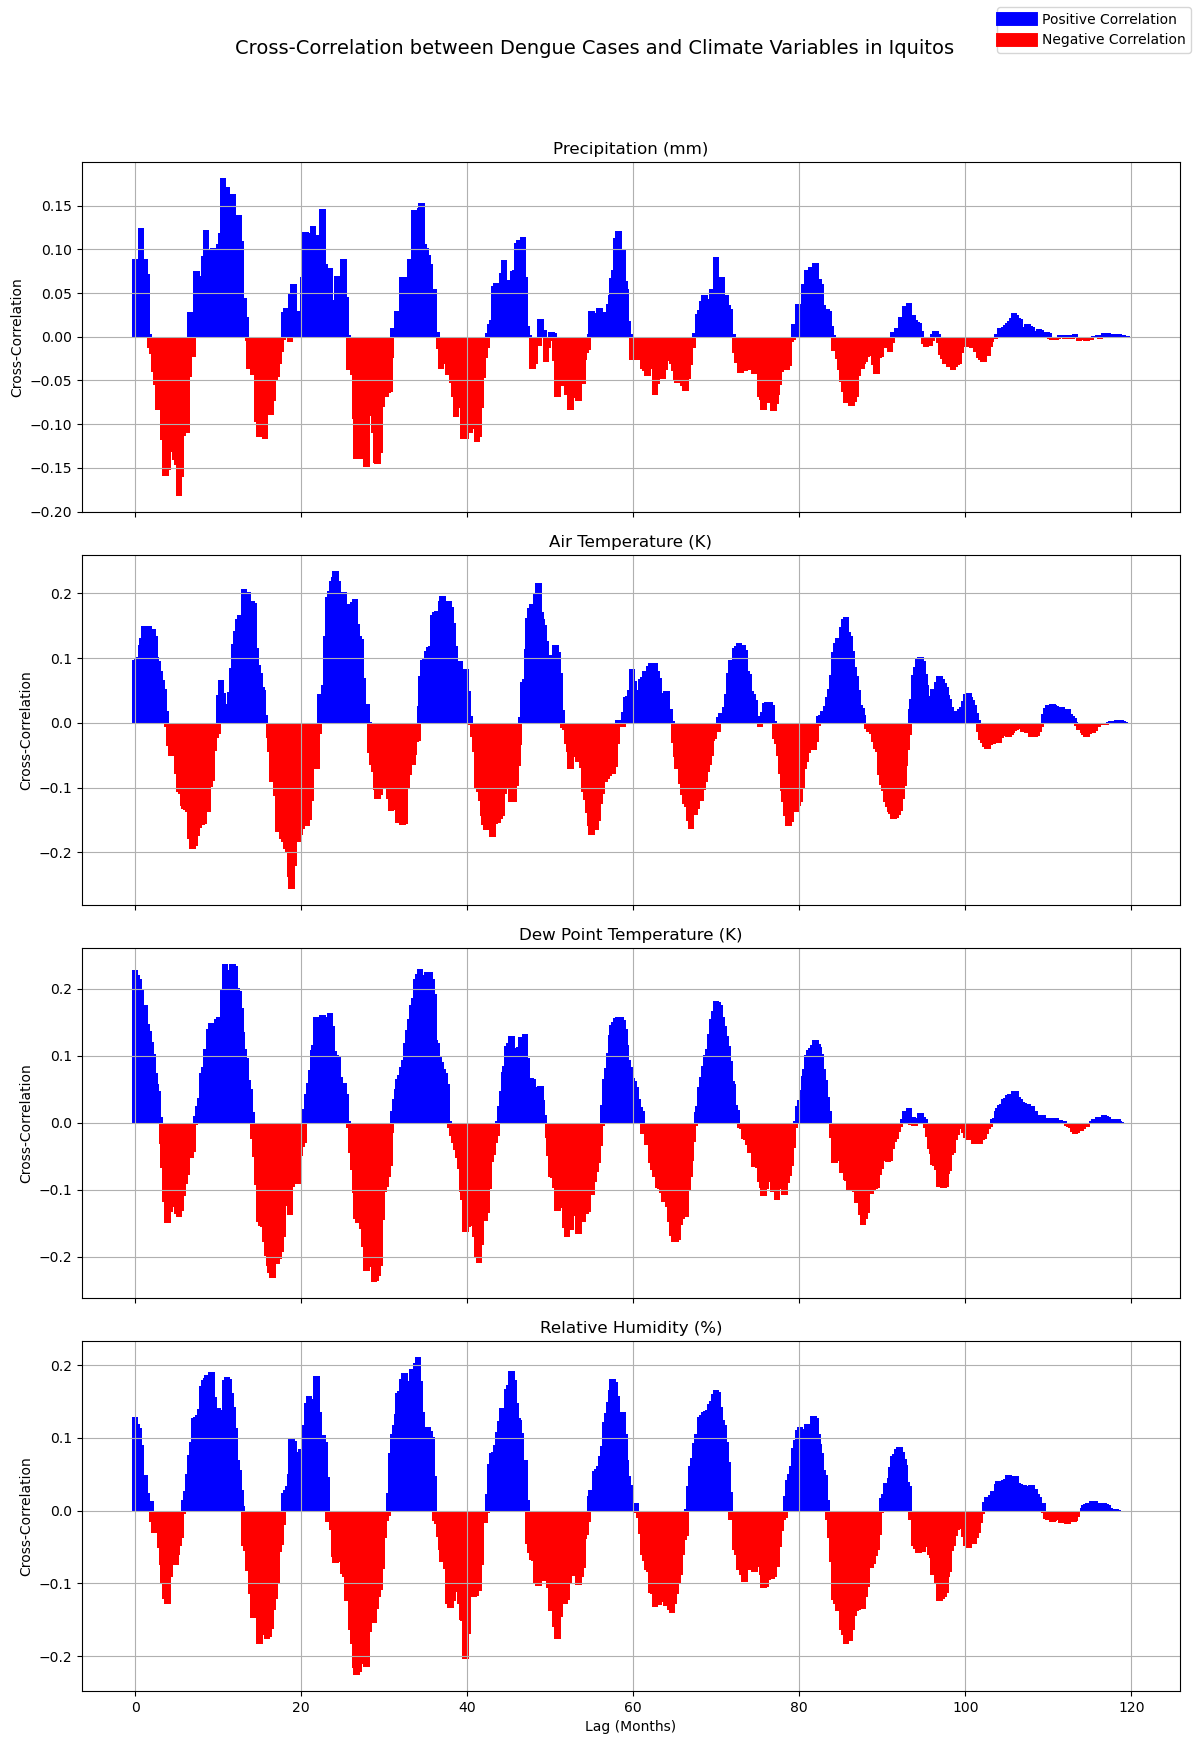

In [89]:
# Select the time series for cross-correlation analysis
city = 'Iquitos'
dengue_cases = DataFinalfill[DataFinalfill['city'] == city]['total_cases']

# Define the features to analyze
features = {
    'Precipitation (mm)': DataFinalfill[DataFinalfill['city'] == city]['precipitation_amt_mm'],
    'Air Temperature (K)': DataFinalfill[DataFinalfill['city'] == city]['reanalysis_air_temp_k'],
    'Dew Point Temperature (K)': DataFinalfill[DataFinalfill['city'] == city]['reanalysis_dew_point_temp_k'],
    'Relative Humidity (%)': DataFinalfill[DataFinalfill['city'] == city]['reanalysis_relative_humidity_percent']
}

# Drop missing values
dengue_cases = dengue_cases.dropna()
for key in features:
    features[key] = features[key].dropna()

# Plot setup
fig, axes = plt.subplots(len(features), 1, figsize=(12, 18), sharex=True)
fig.suptitle(f'Cross-Correlation between Dengue Cases and Climate Variables in {city}', fontsize=14)

# Perform cross-correlation analysis and plot for each feature
for i, (label, feature) in enumerate(features.items()):
    # Perform cross-correlation analysis
    cross_corr = ccf(dengue_cases, feature, adjusted=False)
    
    # Convert weeks to months for the x-axis
    lags_in_weeks = np.arange(len(cross_corr))
    lags_in_months = lags_in_weeks / 4.345  # Approximate weeks to months conversion

    # Plot cross-correlation with different colors for positive and negative correlations
    bars = axes[i].bar(lags_in_months, cross_corr, color=['red' if corr < 0 else 'blue' for corr in cross_corr])
    axes[i].set_title(label)
    axes[i].set_ylabel('Cross-Correlation')
    axes[i].grid(True)

# Set common labels
axes[-1].set_xlabel('Lag (Months)')

# Add a single legend for all subplots
blue_patch = plt.Line2D([0], [0], color='blue', lw=10, label='Positive Correlation')
red_patch = plt.Line2D([0], [0], color='red', lw=10, label='Negative Correlation')
fig.legend(handles=[blue_patch, red_patch], loc='upper right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The cross-correlation analysis shows that in Iquitos, precipitation and dew point temperature have significant cyclical impacts on dengue cases, with both positive and negative correlations at various lags. Air temperature and relative humidity also exhibit periodic influences. In San Juan, similar cyclical patterns are observed across all variables, with strong periodic cycles in precipitation, air temperature, dew point temperature, and relative humidity. These findings highlight the cyclical relationship between climate variables and dengue cases in both cities, emphasizing the need for tailored public health interventions based on these patterns.